## Verification

This process will expore the nc file, and it will try to veirify or compare results with the Ulf sites

In [1008]:
import pandas as pd
from datetime import datetime
from susi_2022.susi.figures import *
from netCDF4 import Dataset
from glob import glob
import os

In [1009]:
working_folder = 'outputs'
outpara = working_folder
scen = 0

files = glob(working_folder+'/*.nc')
tfiles = pd.DataFrame({'files': files})

pFile = pd.read_excel("inputs\sweden\parameters.xlsx")
sites = pFile.columns[9:]

tsites = pd.DataFrame({'sites':sites})
tfiles.join(tsites)

,files,sites
0,outputs\01_Bjdamm_susi.nc,01_Bjdamm
1,outputs\03_Korpis_susi.nc,03_Korpis
2,outputs\04_Frojered_susi.nc,04_Fröjered
3,outputs\05_StraRed_susi.nc,05_SträRed
4,outputs\06_Risabo_susi.nc,06_Risabo
5,outputs\07_Rothult_susi.nc,07_Rothult
6,outputs\08_Ydreham_susi.nc,08_Ydreham
7,outputs\09_Grongol_susi.nc,09_Gröngöl
8,outputs\10_Hallehult_susi.nc,10_Hällehult
9,outputs\11_okalix_susi.nc,11_Ökalix


In [1010]:
ind = 0

In [1011]:
wsite = sites[ind]
print(f'site: {wsite}')

#pFile[wsite]
start_date = pFile.loc[pFile['key']=='start_date', [wsite] ].values[0]
end_date = pFile.loc[pFile['key']=='end_date', [wsite] ].values[0]
days = end_date - start_date
years = end_date[0].year - start_date[0].year
print(f"{years} years, and {days[0].days} days, from: {start_date[0].strftime('%Y-%m-%d')} to: {end_date[0].strftime('%Y-%m-%d')}")

start_date = start_date[0].strftime('%Y-%m-%d')
end_date = end_date[0].strftime('%Y-%m-%d')
ff = files[ind]
#ncf = Dataset('outputs\\05_StraRed_susi.nc', mode='r')
ncf = Dataset(ff, mode='r')


site: 01_Bjdamm
12 years, and 4748 days, from: 2008-01-01 to: 2020-12-31


In [1012]:
print(files[ind])
ncf

outputs\01_Bjdamm_susi.nc


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    description: Peatland simulator Susi results
    history: created 2023-03-14 13:40:20
    source: Susi v.2022,
    dimensions(sizes): nscens(2), ncols(20), nyrs(14), ndays(4749), nLyrs(30)
    variables(dimensions): float64 time(ndays)
    groups: scen, stand, groundvegetation, esom, fertilization, balance, cpy, strip, temperature, methane, export

In [1013]:
ncf['strip']['dwtyr'][0,13]

masked_array(data=[-2.1705334, -2.2168493, -2.291645 , -2.3208158,
                   -2.3346646, -2.349859 , -2.3709605, -2.3984828,
                   -2.434033 , -2.476822 , -2.5268445, -2.5849702,
                   -2.6520247, -2.7299123, -2.8211844, -2.9309309,
                   -3.0639489, -3.2285626, -3.439571 , -3.4858866],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [942]:
#hydrology(ff, scen)
#stand(ff, scen)
#mass(ff, scen)
#carbon(ff, scen)
##compare_1(ff, [0,1])


In [943]:
#plt.savefig(working_folder+ '/graphs/' + wsite + '_TTTTTTTTTTTTTTTTT.png', bbox_inches='tight')

In [1014]:
print(ncf)
ncf['strip']['dwt'][scen,:, :]

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    description: Peatland simulator Susi results
    history: created 2023-03-14 13:40:20
    source: Susi v.2022,
    dimensions(sizes): nscens(2), ncols(20), nyrs(14), ndays(4749), nLyrs(30)
    variables(dimensions): float64 time(ndays)
    groups: scen, stand, groundvegetation, esom, fertilization, balance, cpy, strip, temperature, methane, export


masked_array(
  data=[[-1.        , -0.2858836 , -0.21619813, ..., -0.20737961,
         -0.22044697, -0.26676276],
        [-1.        , -0.34342682, -0.23450962, ..., -0.21678148,
         -0.23584998, -0.28216577],
        [-1.        , -0.3828232 , -0.24985696, ..., -0.2255688 ,
         -0.24816254, -0.29447833],
        ...,
        [-2.1463761 , -2.192692  , -2.263352  , ..., -3.1356766 ,
         -3.3276892 , -3.374005  ],
        [-2.1196158 , -2.1659317 , -2.2347379 , ..., -3.0823703 ,
         -3.2685373 , -3.3148532 ],
        [-2.1197398 , -2.1660554 , -2.2348704 , ..., -3.082617  ,
         -3.2688112 , -3.315127  ]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [1015]:
# Ulf water table data in the obs_GWL
# filter for site and calculate the relative day using the .nc file for reference

obs_GWL = pd.read_csv(f'O:/projects/forestProductivity/01_data_acquisition/Ulf/SecondData/GVN_Man_ALL tidy by Alejandro Gandara.csv', encoding='latin1', sep=';')
obs_GWL = obs_GWL.loc[(obs_GWL.Transekt == 'mean') & (obs_GWL.site == wsite)][['site','date', 'wt']]
obs_GWL['date'] =  pd.to_datetime(obs_GWL['date'])
obs_GWL['relative_day'] = obs_GWL['date'].apply(lambda x: (x - np.datetime64(start_date)).days)
obs_GWL.set_index('relative_day', drop=False, inplace=True)



# obs_GWL.set_index('date', drop=False, inplace=True)
# obs_GWL_t = obs_GWL.reindex(pd.date_range(start_date[0].strftime('%Y-%m-%d'), end_date[0].strftime('%Y-%m-%d')).format("YYY%-mm%-dd%"), fill_value=None).iloc[1:]
# obs_GWL = obs_GWL_t.combine_first(obs_GWL)
# obs_GWL.date = obs_GWL.index
# obs_GWL = obs_GWL[obs_GWL.date.notnull()]



# print(len(obs_GWL))
#obs_GWL[pd.notnull(obs_GWL['wt'])]

In [1016]:
obs_GWL

,site,date,wt,relative_day
relative_day,,,,
2410,01_Bjdamm,2014-08-07,-0.796111111,2410
2445,01_Bjdamm,2014-09-11,-0.795,2445
2464,01_Bjdamm,2014-09-30,-0.696111111,2464
2667,01_Bjdamm,2015-04-21,-0.624444444,2667
2684,01_Bjdamm,2015-05-08,-0.643888889,2684
2718,01_Bjdamm,2015-06-11,-0.706111111,2718
2732,01_Bjdamm,2015-06-25,-0.678888889,2732
2782,01_Bjdamm,2015-08-14,-0.728333333,2782
2802,01_Bjdamm,2015-09-03,-0.692777778,2802


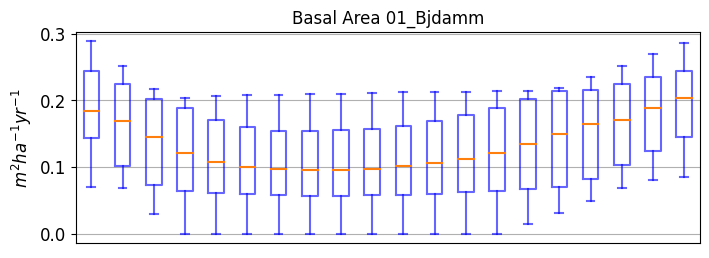

In [1017]:
import matplotlib.gridspec as gridspec
import matplotlib.pylab as plt

facecolor = '#f2f5eb'
fs = 12
cols =ncf.dimensions['ncols'].size #20
fig = plt.figure(num='stand', figsize=(25,18))   #width, height
gs = gridspec.GridSpec(ncols=12, nrows=12, figure=fig, wspace=0.25, hspace=0.25)

ba = ncf['stand']['basalarea'][scen,:, :]
growth = np.diff(ba, axis=0)
dfgrowth = pd.DataFrame(data=growth, columns=list(range(cols)))
axgrowth = fig.add_subplot(gs[8:10, :4])
dfgrowth.boxplot(ax = axgrowth,
                color=dict(boxes='blue', whiskers='blue', medians='blue', caps='blue'),
                boxprops=dict(linestyle='-', linewidth=1.5, color='blue', alpha=0.6),
                flierprops=dict(linestyle='-', linewidth=1.5),
                medianprops=dict(linestyle='-', linewidth=1.5),
                whiskerprops=dict(linestyle='-', linewidth=1.5, color='blue', alpha=0.6),
                capprops=dict(linestyle='-', linewidth=1.5, color='blue', alpha=0.6),
                showfliers=False, grid=True, rot=2)

axgrowth.set_title('Basal Area ' + wsite)
axgrowth.set_ylabel('$m^2 ha^{-1} yr^{-1}$', fontsize=fs)

axgrowth.get_xaxis().set_visible(False)
axgrowth.tick_params(axis='y', labelsize=fs)
#axgrowth.set_facecolor(facecolor)
plt.savefig(working_folder+ '/graphs/' + wsite + '_Basal Area.png', bbox_inches='tight')

In [1018]:
np.mean(ncf['stand']['basalarea'][scen,:, :], axis=1)

masked_array(data=[54.116405, 56.468086, 56.9115  , 57.10177 , 57.30348 ,
                   57.418835, 57.447735, 57.498787, 57.63158 , 57.7584  ,
                   57.823334, 57.888783, 58.04676 , 58.25545 ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [1019]:
ncf['stand']['basalarea'][scen,13, :]

masked_array(data=[58.834545, 58.57704 , 58.329468, 58.1387  , 58.0215  ,
                   57.94598 , 57.904728, 57.89114 , 57.896587, 57.919727,
                   57.96029 , 58.014442, 58.08071 , 58.160244, 58.26173 ,
                   58.374496, 58.49979 , 58.633316, 58.769   , 58.8955  ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [1020]:
y = pd.date_range(start_date, end_date, freq="Y").strftime('%Y')
print(y)
print(f'{len(y)} years')

Index(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020'],
      dtype='object')
13 years


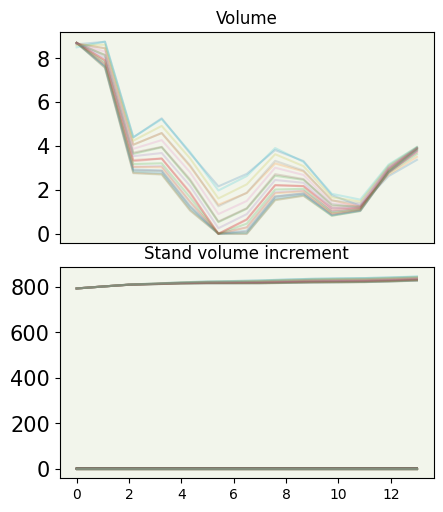

In [1021]:
facecolor = '#f2f5eb'
fs = 15
fig = plt.figure(num='stand', figsize=(15,18))   #width, height
gs = gridspec.GridSpec(ncols=12, nrows=12, figure=fig, wspace=0.25, hspace=0.25)

vol = ncf['stand']['volume'][scen,:, :]
    
ax = fig.add_subplot(gs[10:, 8:])
totvol = vol[:,:]
domvol = ncf['stand']['dominant']['volume'][scen,:, :]
subdomvol = ncf['stand']['subdominant']['volume'][scen,:, :]
undervol= ncf['stand']['under']['volume'][scen,:, :]
for c in range(cols):
    ax.plot(totvol[:,c], alpha=0.2)
for c in range(cols):
    ax.plot(domvol[:,c], alpha=0.2)
for c in range(cols):
    ax.plot(subdomvol[:,c], alpha=0.2)
for c in range(cols):
    ax.plot(undervol[:,c], alpha=0.2)
    
ax.set_facecolor(facecolor)
ax.tick_params(axis='y', labelsize=fs)
ax.set_title('Stand volume increment')

ax = fig.add_subplot(gs[8:10, 8:])
vol = ncf['stand']['volume'][scen,:, :]
for c in range(cols):
    ax.plot(np.diff(vol[:,c]), alpha=0.2)
    
ax.set_facecolor(facecolor)
ax.tick_params(axis='y', labelsize=fs)
ax.set_title('Volume')
ax.get_xaxis().set_visible(False) 


#fig.savefig('myplot.jpg', dpi=300, bbox_inches='tight')


In [1022]:
# basal area
ba_mean = np.mean(ncf['stand']['basalarea'][scen,:, :], axis=1)
bai = np.diff(ba_mean, axis=0,  prepend=0)

#working_folder + '/graphs/' + wsite +
BasalArea = pd.DataFrame({
    'year': pd.date_range(start_date, end_date, freq="Y").strftime('%Y'),
    'ba':ba_mean[1:].tolist(),
    'bai':bai[1:].tolist()
})
BasalArea.to_csv(working_folder+ '/graphs/' +  wsite + '_Basal Area.csv')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


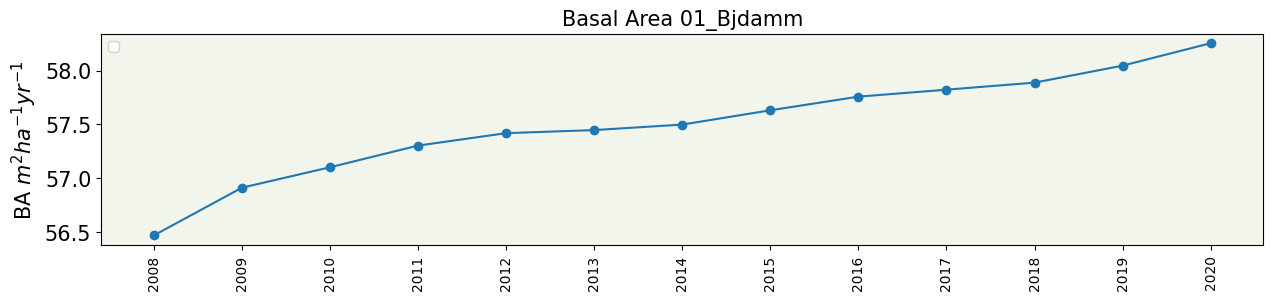

In [1023]:
fs = 15
baFig = plt.figure(num='BasalArea', figsize=(15,18))
gs = gridspec.GridSpec(ncols=12, nrows=12, figure=fig, wspace=0.25, hspace=0.25)

axwtts = baFig.add_subplot(gs[8:10, :])
axwtts.scatter(x= BasalArea['year'], y=BasalArea['ba'])
axwtts.plot(BasalArea['ba'])
axwtts.set_title('Basal Area ' + wsite, fontsize = 15)
axwtts.tick_params(axis='y', labelsize=fs)
axwtts.set_ylabel('BA $m^2 ha^{-1} yr^{-1}$', fontsize=fs)
axwtts.legend(loc= 'upper left')
axwtts.grid(visible=False)
axwtts.set_facecolor(facecolor)
plt.xticks(rotation=90)
plt.savefig(working_folder+ '/graphs/' +  wsite + '_ba.png', bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


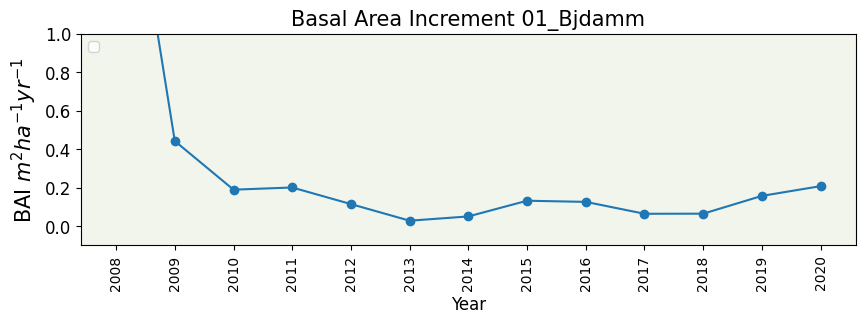

In [1024]:

fs = 15
baiFig = plt.figure(num='BasalArea', figsize=(10,18))
gs = gridspec.GridSpec(ncols=12, nrows=12, figure=fig, wspace=0.25, hspace=0.25)
axwtts = baiFig.add_subplot(gs[8:10, :])
axwtts.scatter(x= BasalArea['year'], y=BasalArea['bai'])
axwtts.plot(BasalArea['bai'],  )

axwtts.set_title('Basal Area Increment ' + wsite, fontsize = fs)
axwtts.tick_params(axis='y', labelsize=fs*0.8)
axwtts.set_ylabel('BAI $m^2 ha^{-1} yr^{-1}$', fontsize=fs)
axwtts.set_xlabel('Year', fontsize=fs*0.8)

axwtts.legend(loc= 'upper left')
axwtts.grid(visible=False)
axwtts.set_ylim([-0.1,1])
axwtts.set_facecolor(facecolor)
plt.xticks(rotation=90)

plt.savefig(working_folder+ '/graphs/' +  wsite + '_bai.png', bbox_inches='tight')

In [1025]:
obs_GWL[obs_GWL['wt'].notna()]

,site,date,wt,relative_day
relative_day,,,,
2410,01_Bjdamm,2014-08-07,-0.796111111,2410
2445,01_Bjdamm,2014-09-11,-0.795,2445
2464,01_Bjdamm,2014-09-30,-0.696111111,2464
2667,01_Bjdamm,2015-04-21,-0.624444444,2667
2684,01_Bjdamm,2015-05-08,-0.643888889,2684
2718,01_Bjdamm,2015-06-11,-0.706111111,2718
2732,01_Bjdamm,2015-06-25,-0.678888889,2732
2782,01_Bjdamm,2015-08-14,-0.728333333,2782
2802,01_Bjdamm,2015-09-03,-0.692777778,2802


In [1026]:
obs_GWL['wt']

relative_day
2410    -0.796111111
2445          -0.795
2464    -0.696111111
2667    -0.624444444
2684    -0.643888889
2718    -0.706111111
2732    -0.678888889
2782    -0.728333333
2802    -0.692777778
2829    -0.656666667
2861    -0.742222222
3044    -0.546111111
3059          -0.705
3082    -0.751111111
3107    -0.778888889
3122    -0.854444444
3138    -0.812777778
3174    -0.885555556
3200    -0.902777778
3229    -0.728888889
Name: wt, dtype: object

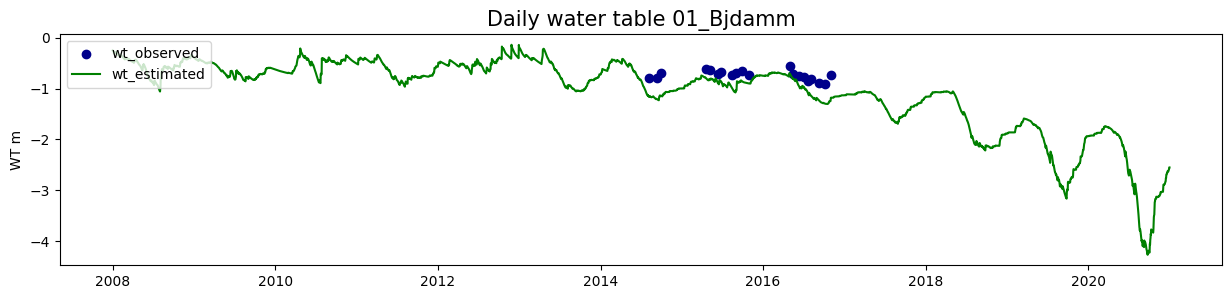

In [1028]:

df_wt = pd.DataFrame({'wt':wt})
df_wt['relative_day'] = df_wt.index
wt_comp = df_wt.join(obs_GWL, lsuffix='_est')
#wt_comp = obs_GWL.join(df_wt, rsuffix='_est')
extra = 200
#wt_comp= wt_comp.loc[(wt_comp['relative_day_est'] >= (obs_GWL.relative_day.min()-extra)) & (wt_comp['relative_day_est'] <= (obs_GWL.relative_day.max()+extra))]

wt_comp['wt'] = pd.to_numeric(wt_comp['wt'], errors='coerce')
wt_comp['date_est'] = pd.to_datetime(start_date) + pd.to_timedelta(wt_comp['relative_day_est'], unit='d')
wt_comp = wt_comp.set_index('date_est')

wt_fig = plt.figure(num='Water table', figsize=(15,3)) 
if len(obs_GWL) > 0: 
    plt.scatter(wt_comp.index, wt_comp['wt'], label='wt_observed', color='darkblue')
plt.plot(wt_comp['wt_est'], label='wt_estimated', color='green')
#plt.xlabel(wt_comp['date_est'])
plt.legend(loc=2)
plt.title('Daily water table ' + wsite, fontsize = 15)
plt.ylabel('WT m')
plt.savefig(working_folder+ '/graphs/' +  wsite + '_wt.png', bbox_inches='tight')

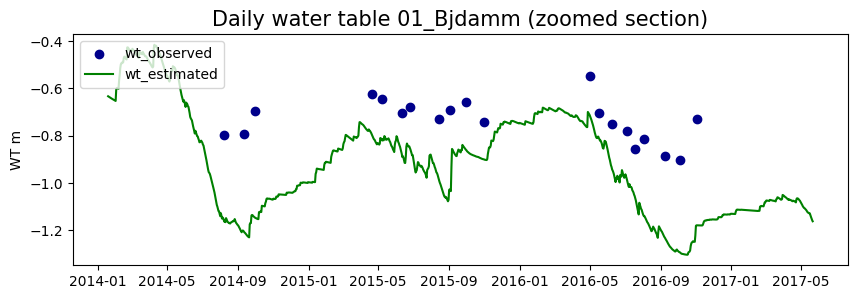

In [1029]:
if len(obs_GWL) > 0:

    df_wt = pd.DataFrame({'wt':wt})
    df_wt['relative_day'] = df_wt.index
    wt_comp = df_wt.join(obs_GWL, lsuffix='_est')
    extra = 200
    wt_comp= wt_comp.loc[(wt_comp['relative_day_est'] >= (obs_GWL.relative_day.min()-extra)) & (wt_comp['relative_day_est'] <= (obs_GWL.relative_day.max()+extra))]

    wt_comp['wt'] = pd.to_numeric(wt_comp['wt'], errors='coerce')
    wt_comp['date_est'] = pd.to_datetime(start_date) + pd.to_timedelta(wt_comp['relative_day_est'], unit='d')
    wt_comp = wt_comp.set_index('date_est')

    wt_fig_section = plt.figure(num='Water table', figsize=(10,3)) 
    if len(obs_GWL) > 0: 
        plt.scatter(wt_comp.index, wt_comp['wt'], label='wt_observed', color='darkblue')
    plt.plot(wt_comp['wt_est'], label='wt_estimated', color='green')
    #plt.xlabel(wt_comp['date_est'])
    plt.legend(loc=2)
    plt.title('Daily water table ' + wsite + ' (zoomed section)', fontsize = 15)
    plt.ylabel('WT m')
    plt.savefig(working_folder+ '/graphs/' +  wsite + '_wt_section.png', bbox_inches='tight')

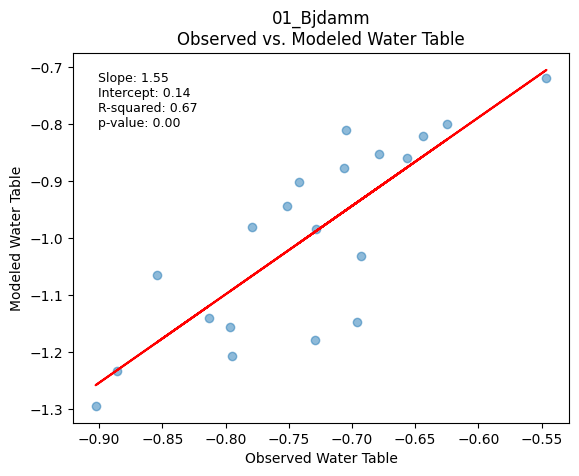

<Figure size 640x480 with 0 Axes>

In [1030]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# read data from a CSV file
data = wt_comp.dropna(subset=['wt'])

# calculate linear regression line
slope, intercept, r_value, p_value, std_err = linregress(data['wt'], data['wt_est'])
line = slope * data['wt'] + intercept

# plot observed vs. modeled water table with linear regression line
plt.scatter(data['wt'], data['wt_est'], alpha=0.5)
plt.plot(data['wt'], line, color='red')
plt.xlabel('Observed Water Table')
plt.ylabel('Modeled Water Table')
plt.title(wsite + '\nObserved vs. Modeled Water Table')

# calculate and print R-squared value as a measure of model fit
r_squared = r_value ** 2
stats_text = f'Slope: {slope:.2f}\nIntercept: {intercept:.2f}\nR-squared: {r_squared:.2f}\np-value: {p_value:.2f}'
plt.annotate(stats_text, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=9, ha='left', va='top')

# show plot and save
plt.show()
plt.savefig(working_folder+ '/graphs/' +  wsite + '_wt_observed vs modeled.png', bbox_inches='tight')
data.to_csv(working_folder+ '/graphs/' +  wsite + '_wt_observed_modeled.csv')


In [972]:
df

,wt_est,relative_day_est,site,date,wt,relative_day,date_est
date_est,,,,,,,
2015-06-17,-0.423149,10759,05_SträRed,2015-06-17,-0.528148,10759.0,2015-06-17
2015-07-14,-0.415244,10786,05_SträRed,2015-07-14,-0.381481,10786.0,2015-07-14
2015-08-13,-0.521633,10816,05_SträRed,2015-08-13,-0.483333,10816.0,2015-08-13
2015-09-02,-0.491062,10836,05_SträRed,2015-09-02,-0.297407,10836.0,2015-09-02
2015-09-18,-0.369300,10852,05_SträRed,2015-09-18,-0.287407,10852.0,2015-09-18
2015-10-02,-0.397434,10866,05_SträRed,2015-10-02,-0.378148,10866.0,2015-10-02
2015-10-31,-0.480448,10895,05_SträRed,2015-10-31,-0.472222,10895.0,2015-10-31
2016-04-28,-0.336189,11075,05_SträRed,2016-04-28,-0.335556,11075.0,2016-04-28
2016-05-19,-0.493392,11096,05_SträRed,2016-05-19,-0.461481,11096.0,2016-05-19


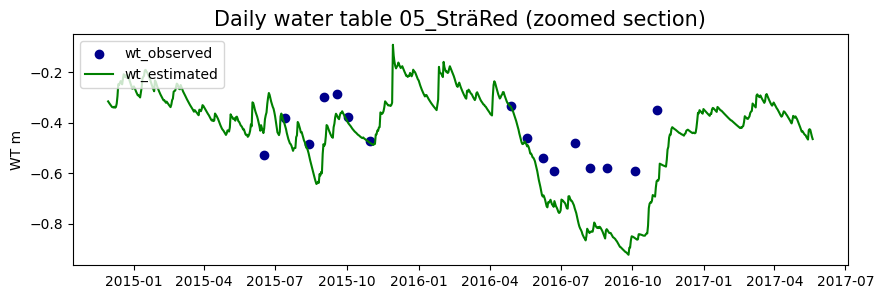

In [962]:
wt_fig
wt_fig_section

In [963]:
wt_comp

wt_comp['date_est'] = pd.to_datetime(start_date) + pd.to_timedelta(wt_comp['relative_day_est'], unit='d')

In [964]:
ncf.close()